In [2]:
from glob import glob
import sys
import os
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from astrometry.util.fits import fits_table, merge_tables

sys.path.append(os.path.abspath(os.path.join(os.path.dirname('py_files'), '..')))
from py_files import brick_DCR
# forced = fits.open('/pscratch/sd/n/nelfalou/fw-test/forced-brickwise-0292p045.fits')[1].data

In [3]:
fns = glob('/pscratch/sd/n/nelfalou/fw-test/forced-brickwise-*.fits')
fns.sort()
len(fns)

1

In [4]:
FF, TT = [], []
for fn in fns:
    forced = fits_table(fn)
    tfn = '/pscratch/sd/d/dstn/forced-nomovegaia/' + 'tractor-forced-' + fn.split('-')[-1]
    tractor = fits_table(tfn)
    
    FF.append(forced)
    TT.append(tractor)
    
F = merge_tables(FF)
T = merge_tables(TT)
len(forced)

438679

In [5]:
F.columns

<bound method tabledata.columns of <tabledata object with 438679 rows and 76 columns: flux, flux_ivar, fracflux, fracin, rchisq, fracmasked, flux_dra, flux_ddec, flux_dra_ivar, flux_ddec_ivar, full_fit_dra, full_fit_ddec, full_fit_flux, full_fit_dra_ivar, full_fit_ddec_ivar, full_fit_flux_ivar, full_fit_x, full_fit_y, win_dra, win_ddec, win_converged, win_edge, win_fracmasked, win_satur, winpsf_dra, winpsf_ddec, winpsf_converged, apflux, apflux_ivar, release, brickid, brickname, objid, camera, expnum, ccdname, filter, mjd, exptime, psfsize, ccd_cuts, airmass, sky, psfdepth, galdepth, fwhm, skyrms, ccdzpt, ccdrarms, ccddecrms, ccdphrms, dra, ddec, dra_ivar, ddec_ivar, flux_motion, flux_motion_ivar, ra, dec, dqmask, x, y, dcr_full_fit_x, dcr_full_fit_y, dcr_full_fit_dra, dcr_full_fit_ddec, dp1, colour_airmass, rm_full_fit_x, rm_full_fit_y, rm_full_fit_dra, rm_full_fit_ddec, lm_full_fit_x, lm_full_fit_y, lm_full_fit_dra, lm_full_fit_ddec>>

In [8]:
crpixes = {'S1': (2151.2, 14826.0),
 'S2': (2151.2, 10566.67),
 'S3': (2151.2, 6307.333),
 'N1': (-103.2001, 14826.0),
 'N2': (-103.2001, 10566.67),
 'N3': (-103.2001, 6307.333),
 'S8': (4405.6, 12696.33),
 'S9': (4405.6, 8437.0),
 'S14': (6660.0, 12696.33),
 'S15': (6660.0, 8437.0),
 'S20': (8914.4, 10566.67),
 'S25': (11168.8, 8437.0),
 'N8': (-2357.6, 12696.33),
 'N9': (-2357.6, 8437.0),
 'N14': (-4612.0, 12696.33),
 'N15': (-4612.0, 8437.0),
 'N20': (-6866.4, 10566.67),
 'N25': (-9120.8, 8437.0),
 'S10': (4405.6, 4177.667),
 'S11': (4405.6, -81.66665),
 'S12': (4405.6, -4341.0),
 'S13': (4405.6, -8600.334),
 'S18': (6660.0, -4341.0),
 'S19': (6660.0, -8600.334),
 'S16': (6660.0, 4177.667),
 'S17': (6660.0, -81.66665),
 'S21': (8914.4, 6307.333),
 'S22': (8914.4, 2048.0),
 'S23': (8914.4, -2211.333),
 'S24': (8914.4, -6470.667),
 'S26': (11168.8, 4177.667),
 'S27': (11168.8, -81.66665),
 'S28': (11168.8, -4341.0),
 'S29': (13423.2, 6307.333),
 'S30': (13423.2, 2048.0),
 'S31': (13423.2, -2211.333),
 'N4': (-103.2001, 2048.0),
 'N5': (-103.2001, -2211.333),
 'N6': (-103.2001, -6470.667),
 'N7': (-103.2001, -10730.0),
 'S4': (2151.2, 2048.0),
 'S5': (2151.2, -2211.333),
 'S6': (2151.2, -6470.667),
 'S7': (2151.2, -10730.0),
 'N10': (-2357.6, 4177.667),
 'N11': (-2357.6, -81.66665),
 'N12': (-2357.6, -4341.0),
 'N13': (-2357.6, -8600.334),
 'N18': (-4612.0, -4341.0),
 'N19': (-4612.0, -8600.334),
 'N16': (-4612.0, 4177.667),
 'N17': (-4612.0, -81.66665),
 'N21': (-6866.4, 6307.333),
 'N22': (-6866.4, 2048.0),
 'N23': (-6866.4, -2211.333),
 'N24': (-6866.4, -6470.667),
 'N26': (-9120.8, 4177.667),
 'N27': (-9120.8, -81.66665),
 'N28': (-9120.8, -4341.0),
 'N29': (-11375.2, 6307.333),
 'N30': (-11375.2, 2048.0),
 'N31': (-11375.2, -2211.333),
 'FS1': (11168.8, -8600.334),
 'FS2': (13423.2, -6470.667),
 'FS3': (15677.6, -81.6666),
 'FS4': (15677.6, 2129.667),
 'FN1': (-9120.8, -8600.334),
 'FN2': (-11375.2, -6470.667),
 'FN3': (-13629.6, -81.6666),
 'FN4': (-13629.6, 2129.667)}

In [9]:
T.cut(T.ref_cat == 'GE')
T.cut((T.flux_g > 0) * (T.flux_i > 0))
objmap = dict([((bid,oid),i) for i,(bid,oid) in enumerate(zip(T.brickid, T.objid))])
F.t_index = np.array([objmap.get((bid,oid), -1) for bid,oid in zip(F.brickid, F.objid)])

# F.gaia_pmra = T.pmra[F.t_index]
# F.gaia_pmdec = T.pmdec[F.t_index]
# F.gaia_pmra_ivar = T.pmra_ivar[F.t_index]
# F.gaia_pmdec_ivar = T.pmdec_ivar[F.t_index]
F.gaia_g = T.gaia_phot_g_mean_mag[F.t_index]
F.gaia_bp = T.gaia_phot_bp_mean_mag[F.t_index]
F.gaia_rp = T.gaia_phot_rp_mean_mag[F.t_index]
F.flux_g = T.flux_g[F.t_index]
# F.flux_r = T.flux_r[F.t_index]
F.flux_i = T.flux_i[F.t_index]
# F.flux_z = T.flux_z[F.t_index]
T.color = -2.5 * (np.log10(T.flux_g / T.flux_i))
F.color = T.color[F.t_index]

p = np.array([crpixes[c] for c in F.ccdname])
F.fpx = F.rm_full_fit_x - p[:,0]
F.fpy = F.rm_full_fit_y - p[:,1]

ux = F.fpx / np.hypot(F.fpx, F.fpy)
uy = F.fpy / np.hypot(F.fpx, F.fpy)
F.dr = (F.rm_full_fit_x - F.x) * ux + (F.rm_full_fit_y - F.y) * uy

In [10]:
# Define cuts I1,I2,I3 for the three color bins.
filt = 'r'
Iok = np.flatnonzero(F.filter == filt)

# pcolors = np.percentile(T.color[F.t_index[Iok]], [1, 33, 66, 99])
pcolors = [0, 1, 2.3, 3.5] # TODO
I1 = np.flatnonzero((F.filter == filt) * (F.color > pcolors[0]) * (F.color < pcolors[1]))
I2 = np.flatnonzero((F.filter == filt) * (F.color > pcolors[1]) * (F.color < pcolors[2]))
I3 = np.flatnonzero((F.filter == filt) * (F.color > pcolors[2]) * (F.color < pcolors[3]))
len(I1), len(I2), len(I3)

(671, 113433, 751)

# Intro plots

# DCR plots

In [11]:
F.bprp = F.gaia_bp - F.gaia_rp

In [12]:
I = np.flatnonzero((F.filter == 'r') *
                   (F.full_fit_dra_ivar != 0) *
                   (F.full_fit_x != F.x) *
                   (F.gaia_bp != 0.) *
                   (F.gaia_rp != 0.) *
                   (F.flux_g != 0) * 
                   (F.flux_i != 0) *
                   (F.dp1 != 0.))
len(I)

34868

In [13]:
dx = F.full_fit_x - F.x
dy = F.full_fit_y - F.y
F.ha = brick_DCR.hour_angle(F.ra, F.mjd + 0.5 * F.exptime / (24 * 60 * 60))
_, F.parallactic = brick_DCR.parallactic(F.dec, F.ha)
F.dp1_before = dx * np.cos(F.parallactic) - dy * np.sin(F.parallactic)

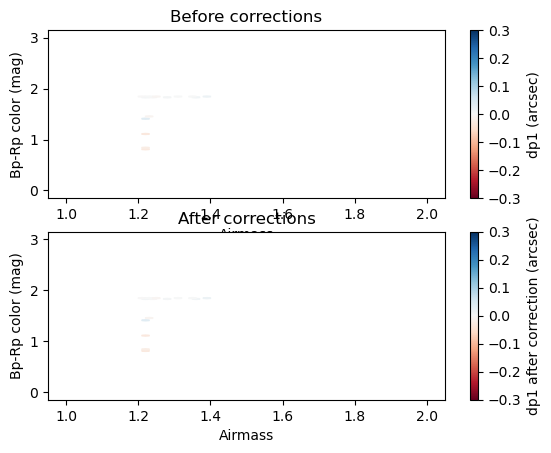

In [14]:
def my_reduce(x):
    if len(x) < 15:
        return np.nan
    return np.median(x)

plt.subplot(2, 1, 1)
plt.hexbin(F.airmass[I], F.bprp[I], C=F.dp1_before[I], reduce_C_function=my_reduce, vmin=-0.3, vmax=0.3,
          extent=(1.0, 2.0, 0., 3.0), gridsize=(50,100), cmap='RdBu');
plt.xlabel('Airmass')
plt.ylabel('Bp-Rp color (mag)')
plt.title("Before corrections")
cb = plt.colorbar()
cb.set_label('dp1 (arcsec)')

plt.subplot(2, 1, 2)
plt.hexbin(F.airmass[I], F.bprp[I], C=F.dp1[I], reduce_C_function=my_reduce, vmin=-0.3, vmax=0.3,
          extent=(1.0, 2.0, 0., 3.0), gridsize=(50,100), cmap='RdBu');
plt.xlabel('Airmass')
plt.ylabel('Bp-Rp color (mag)')
plt.title("After corrections")
cb = plt.colorbar()
cb.set_label('dp1 after correction (arcsec)')
plt.savefig('dcr-corr.png')

# CCD distortions (tree rings + tape/screws) plots

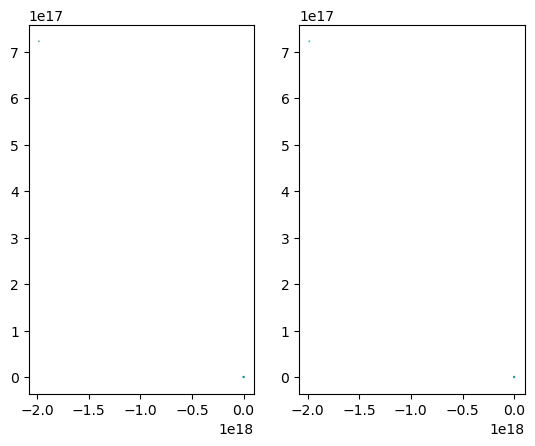

In [18]:
plt.subplot(1, 2, 1)
plt.hexbin(F.fpx, F.fpy, C=F.rm_full_fit_x - F.full_fit_x, reduce_C_function=np.median,
           gridsize=(500,500), vmin=-0.2, vmax=+0.2, cmap='viridis')

plt.subplot(1, 2, 2)
plt.hexbin(F.fpx, F.fpy, C=F.rm_full_fit_y - F.full_fit_y, reduce_C_function=np.median,
           gridsize=(500,500), vmin=-0.2, vmax=+0.2, cmap='viridis')

# Lateral plots

In [15]:
fpax = [F.fpx[Iok].min(), F.fpx[Iok].max(), F.fpy[Iok].min(), F.fpy[Iok].max()]

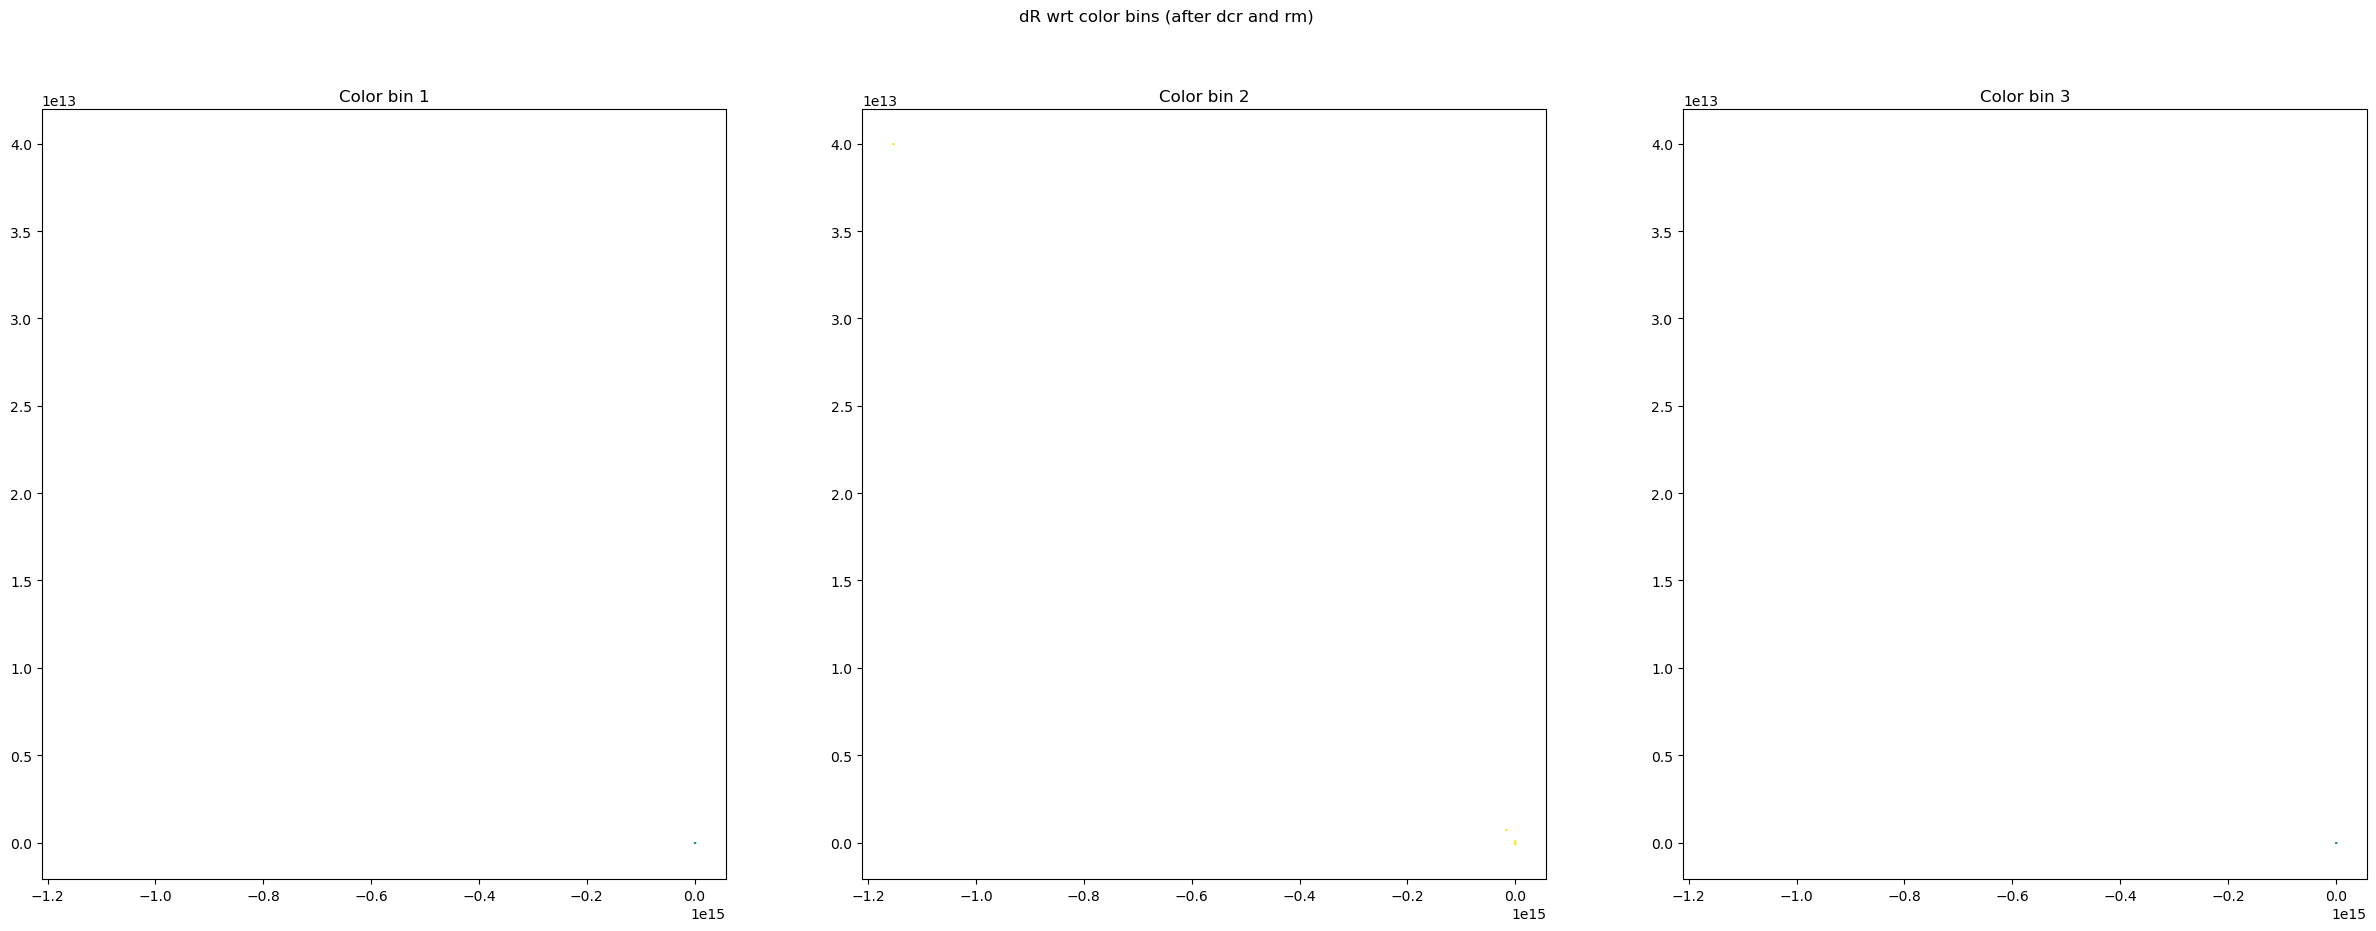

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(30, 10))
for i,I in enumerate([I1,I2,I3]):
    axes[i].hexbin(F.fpx[I], F.fpy[I], C=F.dr[I], reduce_C_function=np.median,
               gridsize=(500,500), vmin=-0.2, vmax=+0.2, extent=fpax, cmap='viridis')
    axes[i].set_title('Color bin %i' % (i+1))
plt.suptitle('dR wrt color bins (after dcr and rm)');

# Error Analysis

# Proper motion comparisons